In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from math import sqrt
from sklearn.linear_model import Ridge, Lasso, BayesianRidge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# EDA

In [2]:
df = pd.read_csv("car_data.csv", sep=";")
df

,id,Marca,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio,Url
0,55019541,toyota,avensis,162000,1998,124,2012,diesel,Barcelona,manual,delantera,berlina,4,white,5,particular,7900,https://www.coches.net/toyota-avensis-120d-exe...
1,54499936,toyota,yaris,64707,1496,111,2020,gasolina,Valencia,manual,delantera,berlina,5,gray,5,profesional,15350,https://www.coches.net/toyota-yaris-15-110-fee...
2,53640000,toyota,aygo,40971,998,69,2018,gasolina,Madrid,manual,delantera,berlina,3,white,4,profesional,12890,https://www.coches.net/toyota-aygo-10-70-xplay...
3,55132910,toyota,corolla,15313,1798,122,2022,hibrido,Madrid,automatic,delantera,berlina,5,black,5,profesional,23999,https://www.coches.net/toyota-corolla-18-125h-...
4,55132906,toyota,chr,33911,1798,122,2022,hibrido,Madrid,automatic,delantera,berlina,5,brown,5,profesional,24999,https://www.coches.net/toyota-chr-18-125h-acti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6810,32339136,toyota,hilux,120000,2494,120,2009,diesel,Córdoba,manual,total,pick up,2,white,2,profesional,21900,https://www.coches.net/toyota-hilux-25-d4d-cab...
6811,54875969,toyota,yaris,260000,1298,87,2005,gasolina,Madrid,manual,delantera,berlina,3,black,5,particular,3000,https://www.coches.net/toyota-yaris-13-vvti-ex...
6812,46282391,toyota,hilux,61000,2393,150,2017,diesel,Córdoba,manual,total,pick up,4,white,5,profesional,24900,https://www.coches.net/toyota-hilux-24-d4d-cab...
6813,52554041,toyota,land cruiser,131000,2755,177,2017,diesel,Córdoba,automatic,total,4x4 suv,5,blue,7,profesional,36800,https://www.coches.net/toyota-land-cruiser-28-...


#### Análisis estadístico rápido para describir los datos del dataframe

In [3]:
#Información sobre el dataframe
df.info()
#Compruebo si existen valores nulos
df.isnull().sum()
#Análisis estadístico rápido
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                6815 non-null   int64 
 1   Marca             6815 non-null   object
 2   Modelo            6815 non-null   object
 3   Km                6815 non-null   int64 
 4   Cilindrada        6815 non-null   int64 
 5   Caballos          6815 non-null   int64 
 6   Año               6815 non-null   int64 
 7   Combustible       6815 non-null   object
 8   Provincia         6815 non-null   object
 9   Transmision       6815 non-null   object
 10  Traccion          6815 non-null   object
 11  Tipo              6815 non-null   object
 12  Puertas           6815 non-null   int64 
 13  Color             6815 non-null   object
 14  Asientos          6815 non-null   int64 
 15  Tipo de vendedor  6815 non-null   object
 16  Precio            6815 non-null   int64 
 17  Url           

id                  0
Marca               0
Modelo              0
Km                  0
Cilindrada          0
Caballos            0
Año                 0
Combustible         0
Provincia           0
Transmision         0
Traccion            0
Tipo                0
Puertas             0
Color               0
Asientos            0
Tipo de vendedor    0
Precio              0
Url                 0
dtype: int64

,id,Km,Cilindrada,Caballos,Año,Puertas,Asientos,Precio
count,6.815000e+03,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000
mean,5.473185e+07,102332.095378,1846.153778,130.619663,2015.834483,4.814233,5.112986,18398.464123
std,7.585202e+05,83168.684798,524.973967,39.063104,5.742714,0.545120,0.794112,9381.636113
min,3.233914e+07,1.000000,998.000000,54.000000,1993.000000,2.000000,2.000000,900.000000
25%,5.469316e+07,43395.000000,1497.000000,115.000000,2013.000000,5.000000,5.000000,11500.000000
50%,5.493767e+07,82000.000000,1798.000000,122.000000,2018.000000,5.000000,5.000000,17890.000000
75%,5.505122e+07,139700.000000,1998.000000,143.000000,2019.000000,5.000000,5.000000,23900.000000
max,5.513291e+07,896096.000000,4461.000000,340.000000,2023.000000,5.000000,9.000000,72000.000000


Tipo de datos ok, valores nulos ok

### Análisis de cada variable

#### id

Compruebo que la columna id sea unica para comprobar que no haya valores repetidos

In [4]:
pd.Series(df["id"]).is_unique

False

Hay valores duplicados, observo cuales son

In [5]:
ids = df["id"]
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

,id,Marca,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio,Url
271,52905464,toyota,auris,48000,1798,136,2018,hibrido,Las Palmas,automatic,delantera,berlina,5,white,5,profesional,16900,https://www.coches.net/toyota-auris-18-140h-hy...
274,52905464,toyota,auris,48000,1798,136,2018,hibrido,Las Palmas,automatic,delantera,berlina,5,white,5,profesional,16900,https://www.coches.net/toyota-auris-18-140h-hy...
2953,53585814,toyota,aygo,22925,998,72,2021,gasolina,Burgos,manual,delantera,berlina,5,gray,4,profesional,13950,https://www.coches.net/toyota-aygo-10-70-xplay...
2955,53585814,toyota,aygo,22925,998,72,2021,gasolina,Burgos,manual,delantera,berlina,5,gray,4,profesional,13950,https://www.coches.net/toyota-aygo-10-70-xplay...
2784,54067814,toyota,aygo,57464,998,72,2021,gasolina,Barcelona,manual,delantera,berlina,5,white,4,profesional,13489,https://www.coches.net/toyota-aygo-10-70-xplay...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,55125747,toyota,camry,16100,2487,218,2020,hibrido,Madrid,automatic,delantera,berlina,4,brown,5,profesional,37900,https://www.coches.net/toyota-camry-25-220h-lu...
179,55130191,toyota,aygo,36000,998,72,2020,gasolina,Alicante,manual,delantera,berlina,5,gray,4,particular,12400,https://www.coches.net/toyota-aygo-10-70-xplay...
173,55130191,toyota,aygo,36000,998,72,2020,gasolina,Alicante,manual,delantera,berlina,5,gray,4,particular,12400,https://www.coches.net/toyota-aygo-10-70-xplay...
89,55130903,toyota,proace city verso,71000,1499,131,2020,diesel,Asturias,automatic,delantera,monovolumen,5,beige,5,particular,26990,https://www.coches.net/toyota-proace-city-vers...


Elimino duplicados

In [6]:
df = df.drop_duplicates()
df

,id,Marca,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio,Url
0,55019541,toyota,avensis,162000,1998,124,2012,diesel,Barcelona,manual,delantera,berlina,4,white,5,particular,7900,https://www.coches.net/toyota-avensis-120d-exe...
1,54499936,toyota,yaris,64707,1496,111,2020,gasolina,Valencia,manual,delantera,berlina,5,gray,5,profesional,15350,https://www.coches.net/toyota-yaris-15-110-fee...
2,53640000,toyota,aygo,40971,998,69,2018,gasolina,Madrid,manual,delantera,berlina,3,white,4,profesional,12890,https://www.coches.net/toyota-aygo-10-70-xplay...
3,55132910,toyota,corolla,15313,1798,122,2022,hibrido,Madrid,automatic,delantera,berlina,5,black,5,profesional,23999,https://www.coches.net/toyota-corolla-18-125h-...
4,55132906,toyota,chr,33911,1798,122,2022,hibrido,Madrid,automatic,delantera,berlina,5,brown,5,profesional,24999,https://www.coches.net/toyota-chr-18-125h-acti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6810,32339136,toyota,hilux,120000,2494,120,2009,diesel,Córdoba,manual,total,pick up,2,white,2,profesional,21900,https://www.coches.net/toyota-hilux-25-d4d-cab...
6811,54875969,toyota,yaris,260000,1298,87,2005,gasolina,Madrid,manual,delantera,berlina,3,black,5,particular,3000,https://www.coches.net/toyota-yaris-13-vvti-ex...
6812,46282391,toyota,hilux,61000,2393,150,2017,diesel,Córdoba,manual,total,pick up,4,white,5,profesional,24900,https://www.coches.net/toyota-hilux-24-d4d-cab...
6813,52554041,toyota,land cruiser,131000,2755,177,2017,diesel,Córdoba,automatic,total,4x4 suv,5,blue,7,profesional,36800,https://www.coches.net/toyota-land-cruiser-28-...


In [7]:
pd.Series(df["id"]).is_unique

True

#### Modelo

In [8]:
print(df["Modelo"].unique())

['avensis' 'yaris' 'aygo' 'corolla' 'chr' 'auris' 'yaris cross' 'verso'
 'prius' 'c-hr' 'proace city verso' 'rav4' 'corolla verso' 'yaris verso'
 'proace city' 'land cruiser' 'land cruiser 200' 'land cruiser 100'
 'priusplus' 'dyna' 'celica' 'proace verso' 'hilux' 'urban cruiser'
 'camry' 'land cruiser 90' 'gr supra' 'iq' 'aygo x cross'
 'land cruiser 80' 'gr yaris' 'gt86' 'supra' 'mr2' 'highlander' '4runner'
 'corolla sedan' 'carina e' 'prius+' 'avensis verso' 'paseo']


Hay un modelo que es chr y otro c-hr. Esto es un error ya que es el mismo modelo que está guardado con una nomenclatura diferente. Para ello, sustituyo los que tengan el valor 'c-hr' por 'chr

In [9]:
df.loc[df['Modelo'] == 'c-hr', 'Modelo'] = 'chr'

Compruebo que se hayan cambiado

In [10]:
df[df['Modelo'] == 'c-hr'].Modelo.count()

0

In [11]:
lista_modelos = df["Modelo"].unique().tolist()
lista_modelos.sort()
print(lista_modelos)

['4runner', 'auris', 'avensis', 'avensis verso', 'aygo', 'aygo x cross', 'camry', 'carina e', 'celica', 'chr', 'corolla', 'corolla sedan', 'corolla verso', 'dyna', 'gr supra', 'gr yaris', 'gt86', 'highlander', 'hilux', 'iq', 'land cruiser', 'land cruiser 100', 'land cruiser 200', 'land cruiser 80', 'land cruiser 90', 'mr2', 'paseo', 'prius', 'prius+', 'priusplus', 'proace city', 'proace city verso', 'proace verso', 'rav4', 'supra', 'urban cruiser', 'verso', 'yaris', 'yaris cross', 'yaris verso']


El resto de modelos está bien

#### Número de coches por cada modelo

In [12]:
prueba = df['Modelo'].value_counts()
prueba = pd.DataFrame(prueba)
prueba

,Modelo
chr,1153
yaris,1063
auris,873
rav4,830
corolla,774
land cruiser,446
aygo,415
avensis,277
verso,183
prius,113


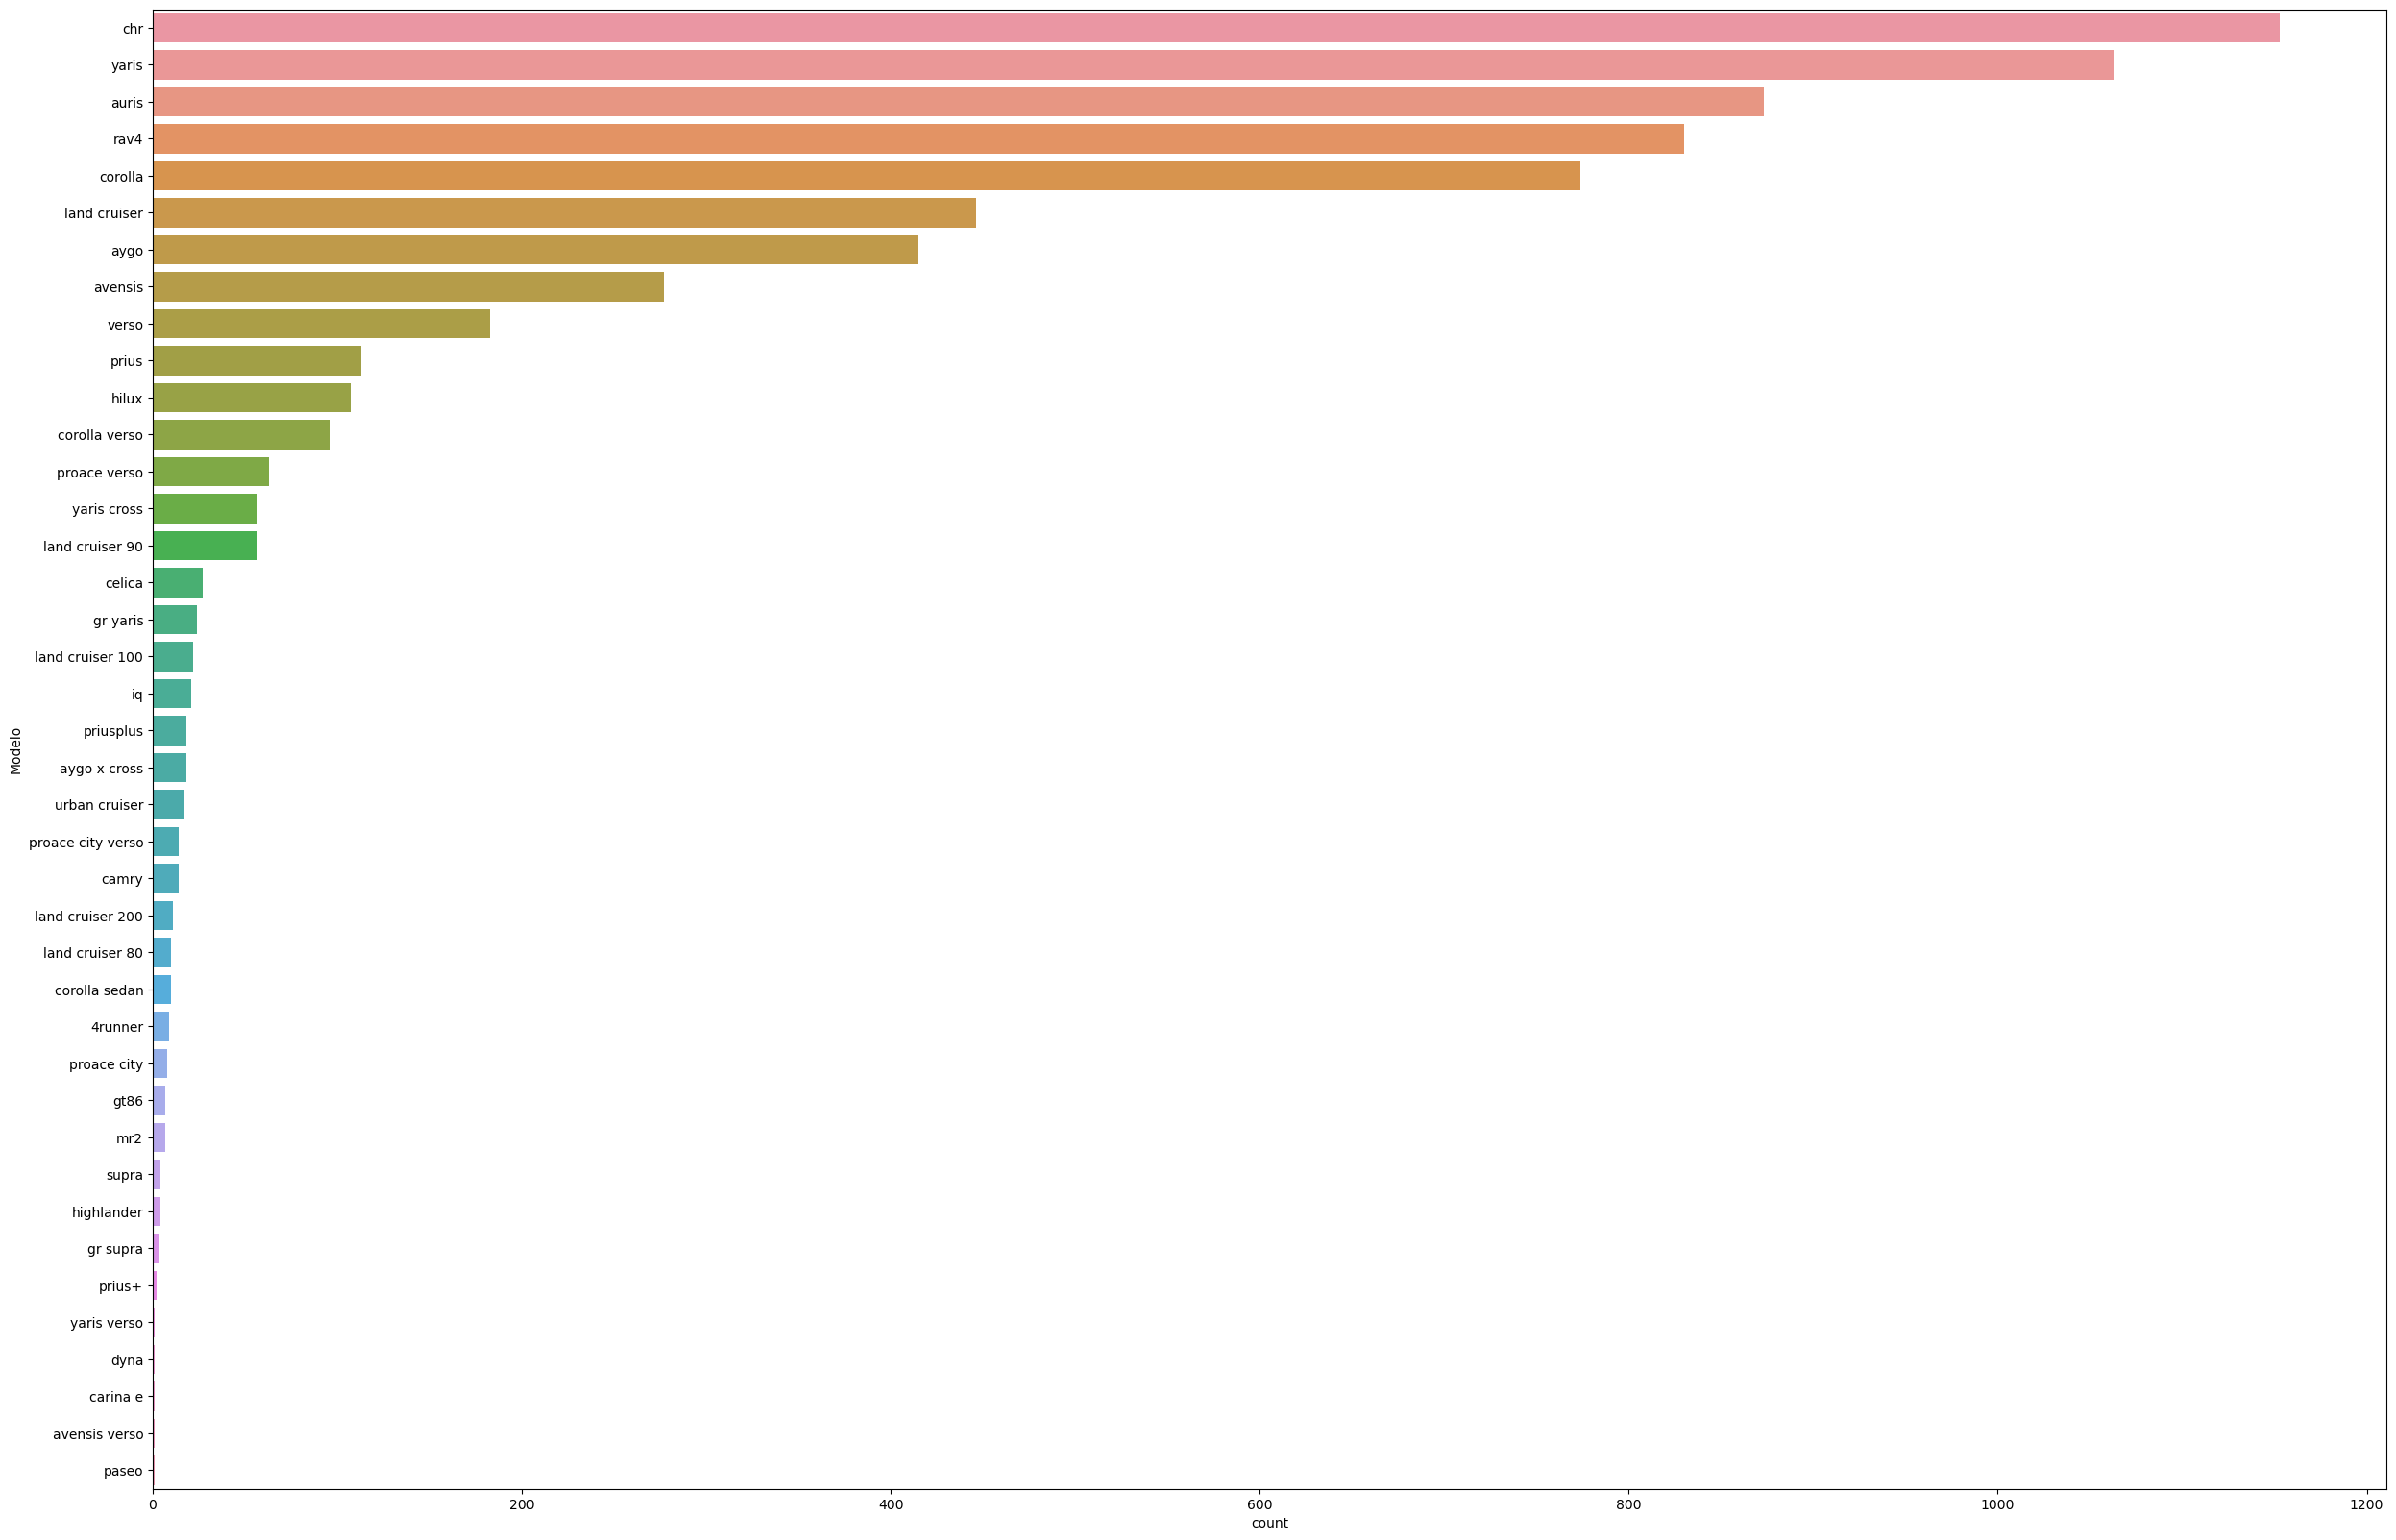

In [13]:
_= plt.subplots(figsize=(30,20))
_= sns.countplot(y=df["Modelo"], order = df['Modelo'].value_counts().index)
plt.show()

#### Combustible

In [14]:
print(df["Combustible"].unique())

['diesel' 'gasolina' 'hibrido' 'hibrido enchufable' 'electrico']


Toyota no tiene eléctricos, está sacando pero quiero ver esos datos por si se trata de un error

In [15]:
df[df['Combustible'] == 'electrico']

,id,Marca,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio,Url
2230,55096152,toyota,prius,184231,1497,112,2006,electrico,Barcelona,automatic,delantera,berlina,5,gray,5,profesional,6900,https://www.coches.net/toyota-prius-15-vvti-hs...
3558,55056449,toyota,prius,364487,1497,112,2006,electrico,Madrid,automatic,delantera,berlina,5,gray,5,particular,4200,https://www.coches.net/toyota-prius-15-vvti-hs...
3787,55046040,toyota,prius,96000,1497,112,2005,electrico,Madrid,automatic,delantera,berlina,5,gray,5,profesional,9800,https://www.coches.net/toyota-prius-15-vvti-hs...
4157,55027276,toyota,prius,88000,1497,112,2005,electrico,Salamanca,automatic,delantera,berlina,5,blue,5,profesional,7800,https://www.coches.net/toyota-prius-15-vvti-hs...
4482,55011713,toyota,prius,150000,1497,112,2006,electrico,Las Palmas,automatic,delantera,berlina,5,beige,5,profesional,6000,https://www.coches.net/toyota-prius-15-vvti-hs...
4841,54989890,toyota,prius,450000,1497,112,2005,electrico,Barcelona,automatic,delantera,berlina,5,blue,5,particular,2500,https://www.coches.net/toyota-prius-15-vvti-hs...
5888,54854625,toyota,prius,262000,1497,112,2006,electrico,Madrid,automatic,delantera,berlina,5,gray,5,profesional,6990,https://www.coches.net/toyota-prius-15-vvti-hs...
6211,54717566,toyota,prius,188362,1497,112,2007,electrico,A Coruña,automatic,delantera,berlina,5,red,5,particular,7200,https://www.coches.net/toyota-prius-15-vvti-hs...
6699,53075577,toyota,prius,190000,1497,112,2005,electrico,Barcelona,automatic,delantera,berlina,5,gray,5,particular,6550,https://www.coches.net/toyota-prius-15-vvti-hs...
6735,54074374,toyota,prius,300000,1497,112,2004,electrico,Baleares,automatic,delantera,berlina,5,gray,5,particular,6000,https://www.coches.net/toyota-prius-15-vvti-hs...


Esos anuncios son erróneos ya que el prius de esos años no es eléctrico, es híbrido. De hecho voy a comprobar los del año 2008 a ver como están guardados 

In [16]:
df[(df.Modelo == "prius") & df.Año.isin([2008])]

,id,Marca,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio,Url
6414,54607115,toyota,prius,320000,1497,112,2008,hibrido,Las Palmas,automatic,delantera,berlina,5,gray,5,profesional,5900,https://www.coches.net/toyota-prius-15-vvti-so...
6717,53613473,toyota,prius,420000,1497,112,2008,hibrido,A Coruña,automatic,delantera,berlina,5,white,5,particular,5000,https://www.coches.net/toyota-prius-15-vvti-so...


Los prius de 2004, 2005, 2006 y 2007 están categorizados como eléctricos, pero esto es un error ya que este coche no es eléctrico, es híbrido, de hecho observando los del año 2008 en adelante ya están categorizados como híbridos, por tanto voy a sustutir esos valores.

In [17]:
df.loc[df['Combustible'] == 'electrico', 'Combustible'] = 'hibrido'

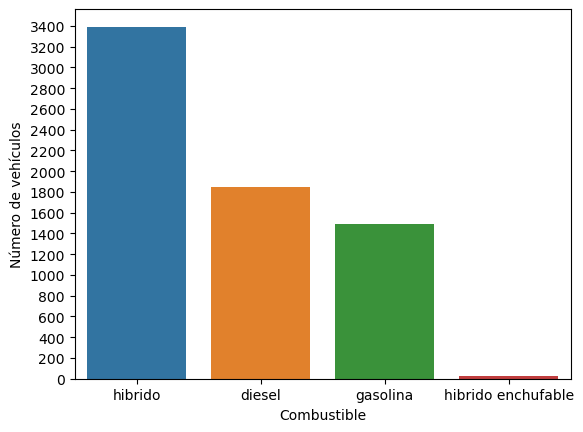

In [18]:
fig, ax = plt.subplots()
_= sns.countplot(x=df["Combustible"], order = df['Combustible'].value_counts().index)
_= ax.set_yticks(range(0,3600,200))
_= ax.set_ylabel('Número de vehículos')
plt.show()

In [19]:
pd.DataFrame(df['Combustible'].value_counts())

,Combustible
hibrido,3393
diesel,1845
gasolina,1491
hibrido enchufable,31


#### Provincia

In [20]:
print(df["Provincia"].unique())

['Barcelona' 'Valencia' 'Madrid' 'Sevilla' 'Girona' 'Las Palmas' 'Vizcaya'
 'Tarragona' 'Alicante' 'Almería' 'Málaga' 'Baleares' 'Jaén' 'Murcia'
 'Sta. C. Tenerife' 'Huesca' 'Melilla' 'Burgos' 'Pontevedra' 'Cuenca'
 'Asturias' 'Córdoba' 'Valladolid' 'Álava' 'Salamanca' 'León' 'Zaragoza'
 'Cádiz' 'Ciudad Real' 'Navarra' 'Cáceres' 'Lugo' 'Granada' 'Castellón'
 'A Coruña' 'Lleida' 'Palencia' 'Soria' 'Toledo' 'Badajoz' 'La Rioja'
 'Cantabria' 'Albacete' 'Guipúzcoa' 'Zamora' 'Huelva' 'Segovia' 'Teruel'
 'Ávila' 'Orense' 'Ceuta' 'Guadalajara']


Las provincias están ok

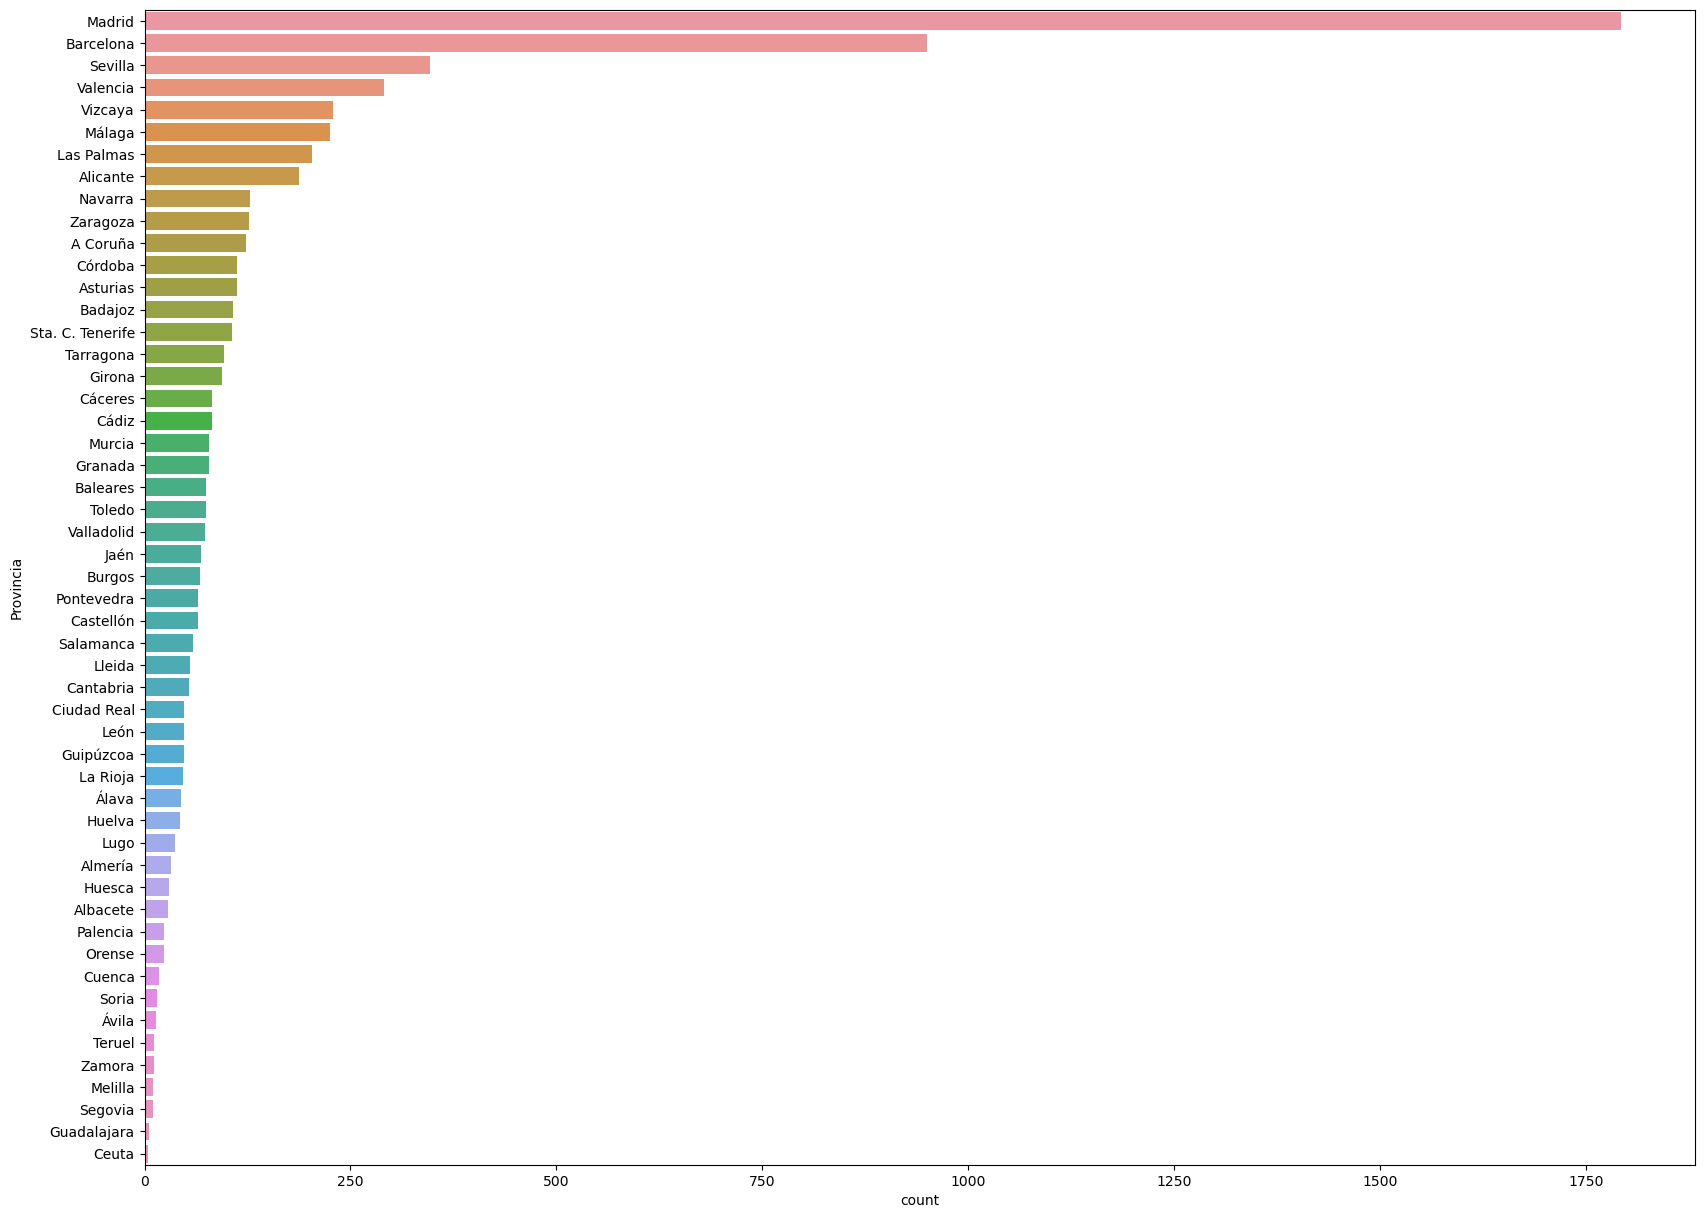

In [21]:
_= plt.subplots(figsize=(20,15))
_= sns.countplot(y=df["Provincia"], order = df['Provincia'].value_counts().index)
plt.show()

In [22]:
pd.DataFrame(df['Provincia'].value_counts())

,Provincia
Madrid,1792
Barcelona,950
Sevilla,347
Valencia,291
Vizcaya,229
Málaga,225
Las Palmas,203
Alicante,187
Navarra,128
Zaragoza,127


#### Transmisión

['manual', 'automatic']


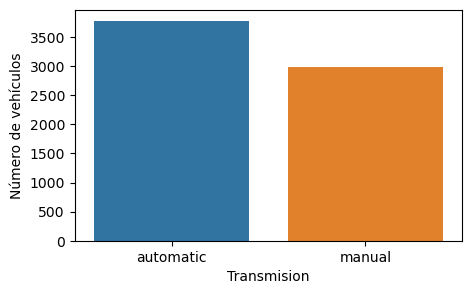

In [23]:
print(df["Transmision"].unique().tolist())

_= plt.subplots(figsize=(5,3))
ax = sns.countplot(x=df["Transmision"], order = df['Transmision'].value_counts().index)
_ = ax.set(ylabel='Número de vehículos')
plt.show()

In [24]:
pd.DataFrame(df['Transmision'].value_counts())

,Transmision
automatic,3781
manual,2979


#### Tracción

['delantera', 'total', 'trasera']


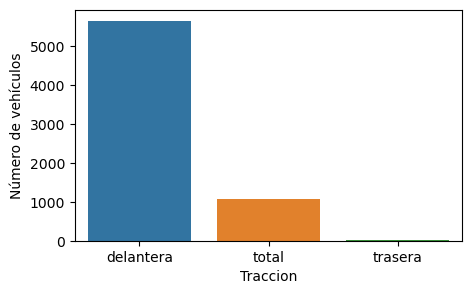

In [25]:
print(df["Traccion"].unique().tolist())

_= plt.subplots(figsize=(5,3))
ax = sns.countplot(x=df["Traccion"], order = df['Traccion'].value_counts().index)
_ = ax.set(ylabel='Número de vehículos')
plt.show()

Compruebo trasera por si se trata de un error en los datos

In [26]:
pd.DataFrame(df['Traccion'].value_counts())

,Traccion
delantera,5660
total,1078
trasera,22


In [27]:
df[(df.Traccion == "trasera")].head()

,id,Marca,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio,Url
73,55131191,toyota,dyna,229318,2982,109,2009,diesel,Sevilla,manual,trasera,pick up,2,white,3,particular,9300,https://www.coches.net/toyota-dyna-100-s-3023-...
294,55078902,toyota,gr supra,40,1998,258,2022,gasolina,Madrid,automatic,trasera,coupe,2,red,2,profesional,55890,https://www.coches.net/toyota-gr-supra-20t-190...
1049,55118825,toyota,gt86,253900,1998,200,2012,gasolina,Barcelona,manual,trasera,coupe,2,white,4,profesional,17990,https://www.coches.net/toyota-gt86-gt86-gasoli...
1382,54894031,toyota,supra,44248,2998,340,2019,gasolina,Valencia,automatic,trasera,coupe,2,yellow,2,profesional,55900,https://www.coches.net/toyota-supra-supra-2p-g...
1685,55106776,toyota,mr2,82000,1794,140,2002,gasolina,Barcelona,manual,trasera,cabrio,2,red,2,particular,14500,https://www.coches.net/toyota-mr2-18-roadster-...


Los datos estan ok, los que tienen traccion trasera son coches deportivos y por eso en la gráfica su valor era tan bajo. Hay pocos coches deportivos a la venta

#### Tipo

In [28]:
print(df["Tipo"].unique().tolist())

['berlina', 'familiar', '4x4 suv', 'monovolumen', 'pick up', 'coupe', 'cabrio']


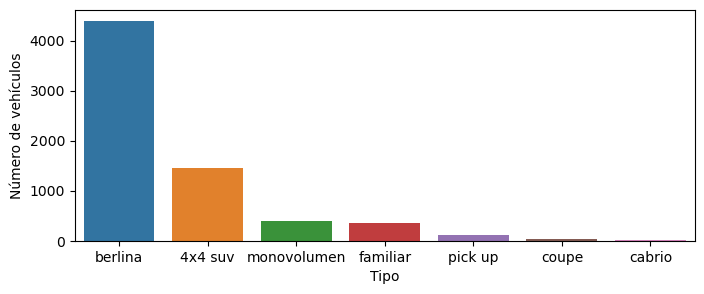

In [29]:
_= plt.subplots(figsize=(8,3))
ax= sns.countplot(x=df["Tipo"], order = df['Tipo'].value_counts().index)
_ = ax.set(ylabel='Número de vehículos')
plt.show()

In [30]:
pd.DataFrame(df['Tipo'].value_counts())

,Tipo
berlina,4397
4x4 suv,1462
monovolumen,386
familiar,358
pick up,108
coupe,42
cabrio,7


#### Puertas

In [31]:
print(df["Puertas"].unique().tolist())

[4, 5, 3, 2]


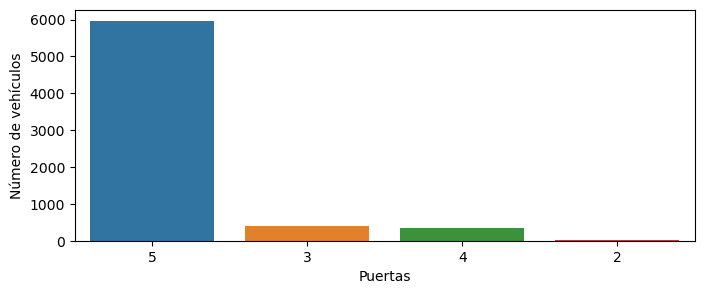

In [32]:
_= plt.subplots(figsize=(8,3))
ax = sns.countplot(x=df["Puertas"], order = df['Puertas'].value_counts().index)
_ = ax.set(ylabel='Número de vehículos')
plt.show()

Voy a comprobar los coches que tienen 2 puertas ya que su valores es muy bajo y quiero comprobar de que modelos se trata por si se trata de un error en los datos

In [33]:
pd.DataFrame(df['Puertas'].value_counts())

,Puertas
5,5970
3,407
4,354
2,29


In [34]:
df[(df.Puertas == 2)].head()

,id,Marca,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio,Url
73,55131191,toyota,dyna,229318,2982,109,2009,diesel,Sevilla,manual,trasera,pick up,2,white,3,particular,9300,https://www.coches.net/toyota-dyna-100-s-3023-...
294,55078902,toyota,gr supra,40,1998,258,2022,gasolina,Madrid,automatic,trasera,coupe,2,red,2,profesional,55890,https://www.coches.net/toyota-gr-supra-20t-190...
1049,55118825,toyota,gt86,253900,1998,200,2012,gasolina,Barcelona,manual,trasera,coupe,2,white,4,profesional,17990,https://www.coches.net/toyota-gt86-gt86-gasoli...
1382,54894031,toyota,supra,44248,2998,340,2019,gasolina,Valencia,automatic,trasera,coupe,2,yellow,2,profesional,55900,https://www.coches.net/toyota-supra-supra-2p-g...
1685,55106776,toyota,mr2,82000,1794,140,2002,gasolina,Barcelona,manual,trasera,cabrio,2,red,2,particular,14500,https://www.coches.net/toyota-mr2-18-roadster-...


Los datos están ok, se trata de nuevo de los deportivos y de las pick ups

#### Color

In [35]:
print(df["Color"].unique().tolist())

['white', 'gray', 'black', 'brown', 'blue', 'red', 'beige', 'garnet', 'orange', 'yellow', 'green', 'purple']


In [36]:
#Cambio los colores a español
df2 = df.copy(deep=True)
df2["Color"] = df2["Color"].replace(['gray', 'white', 'garnet', 'blue', 'black', 'red', 'brown', 'green', 'yellow', 'orange', 'purple'], 
                                    ['gris', 'blanco', 'granate', 'azul', 'negro', 'rojo', 'marron', 'verde', 'amarillo', 'naranja', 'morado'])
df = df2.copy(deep=True)

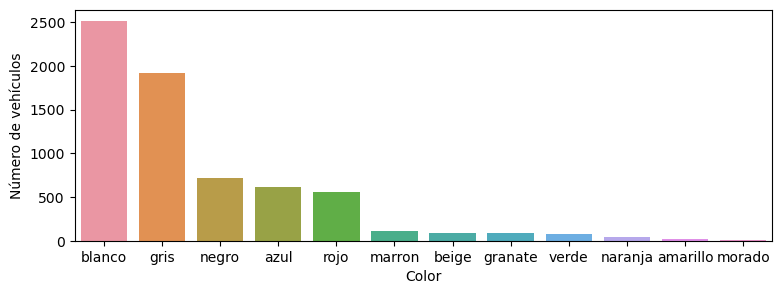

In [37]:
_= plt.subplots(figsize=(9,3))
ax= sns.countplot(x=df["Color"], order = df['Color'].value_counts().index)
_ = ax.set(ylabel='Número de vehículos')
plt.show()

In [38]:
pd.DataFrame(df['Color'].value_counts())

,Color
blanco,2517
gris,1924
negro,717
azul,613
rojo,555
marron,115
beige,88
granate,86
verde,78
naranja,37


#### Asientos

In [39]:
print(df["Asientos"].unique().tolist())

[5, 4, 7, 8, 3, 9, 2, 6]


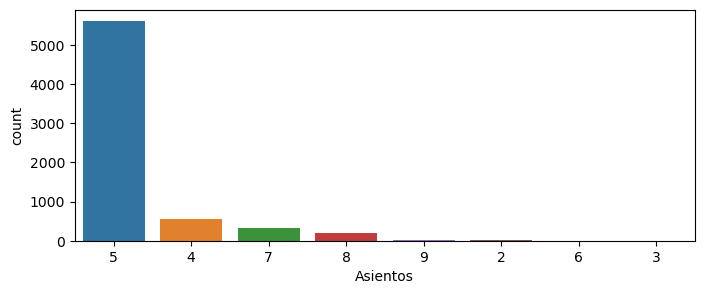

In [40]:
_= plt.subplots(figsize=(8,3))
_= sns.countplot(x=df["Asientos"], order = df['Asientos'].value_counts().index)
plt.show()

In [41]:
pd.DataFrame(df['Asientos'].value_counts())

,Asientos
5,5621
4,552
7,335
8,197
9,30
2,22
6,2
3,1


#### Tipo de vendedor

In [42]:
print(df["Tipo de vendedor"].unique().tolist())

['particular', 'profesional']


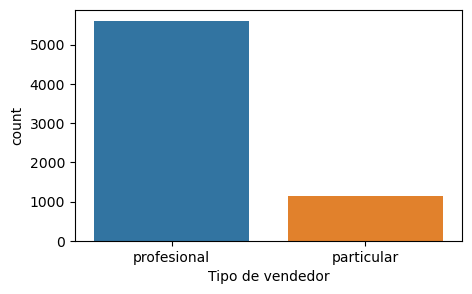

In [43]:
_= plt.subplots(figsize=(5,3))
_= sns.countplot(x=df["Tipo de vendedor"], order = df['Tipo de vendedor'].value_counts().index)
plt.show()

In [44]:
pd.DataFrame(df['Tipo de vendedor'].value_counts())

,Tipo de vendedor
profesional,5612
particular,1148


#### Variables numéricas ('Caballos', 'Cilindrada', 'Anio', 'Precio', 'Km')

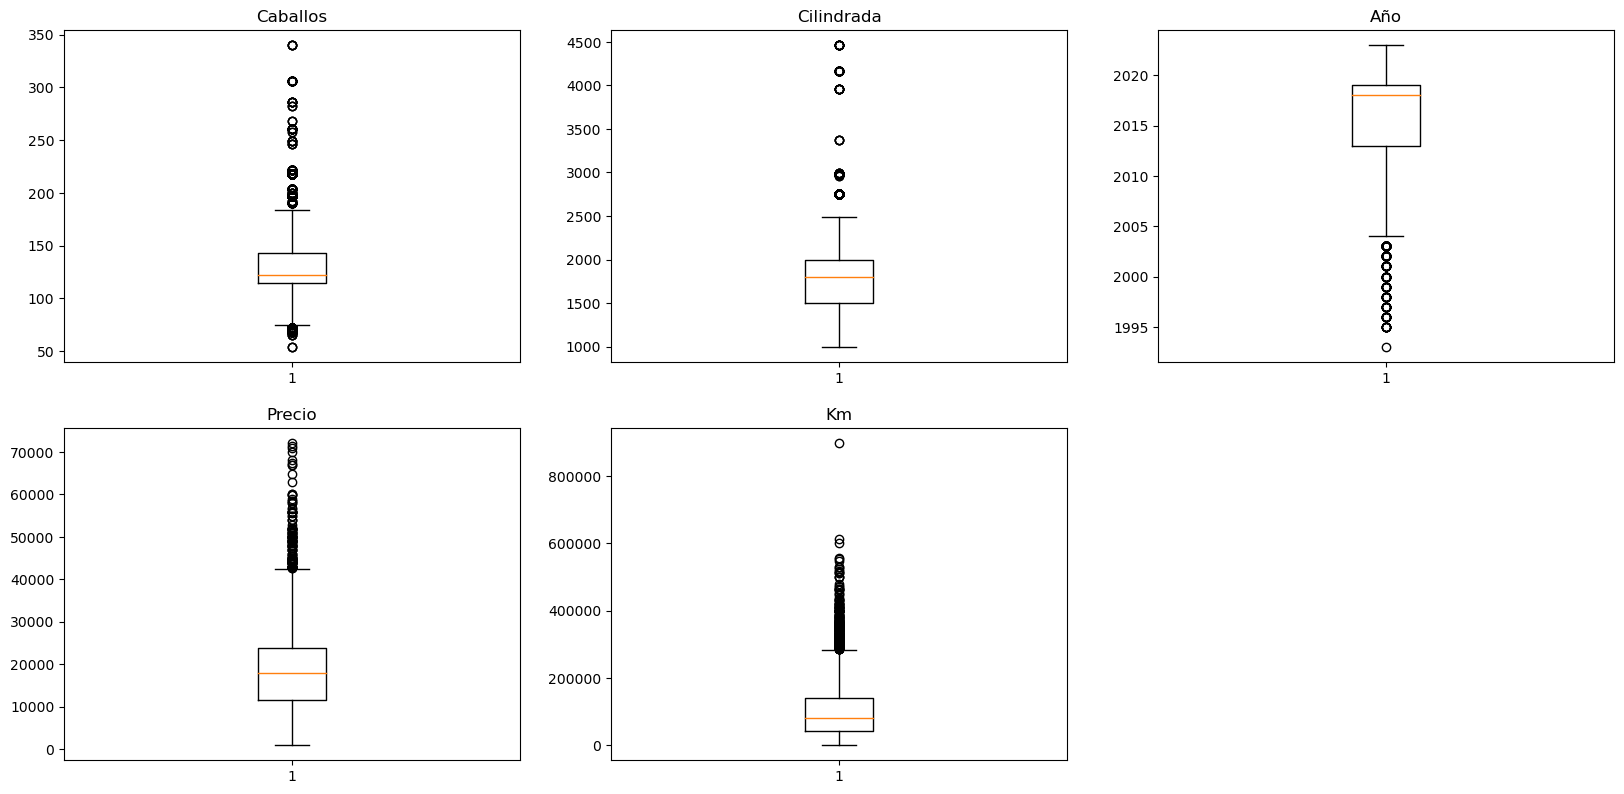

In [45]:
numerical_variables = ['Caballos', 'Cilindrada', 'Año', 'Precio', 'Km']

_= plt.figure(figsize=(20,25))

for index, x in enumerate(numerical_variables):
    _= plt.subplot(5, 3, index+1)
    _= plt.boxplot(df[x])
    _= plt.title(x)

In [46]:
df.describe()

,id,Km,Cilindrada,Caballos,Año,Puertas,Asientos,Precio
count,6.760000e+03,6760.000000,6760.000000,6760.00000,6760.000000,6760.000000,6760.000000,6760.000000
mean,5.473111e+07,102466.484320,1846.284320,130.62071,2015.826479,4.814349,5.112870,18386.951036
std,7.607246e+05,83275.504409,524.862505,39.05667,5.746011,0.545328,0.794164,9380.868773
min,3.233914e+07,1.000000,998.000000,54.00000,1993.000000,2.000000,2.000000,900.000000
25%,5.469143e+07,43453.000000,1497.000000,115.00000,2013.000000,5.000000,5.000000,11500.000000
50%,5.493765e+07,82000.000000,1798.000000,122.00000,2018.000000,5.000000,5.000000,17890.000000
75%,5.505111e+07,139789.750000,1998.000000,143.00000,2019.000000,5.000000,5.000000,23900.000000
max,5.513291e+07,896096.000000,4461.000000,340.00000,2023.000000,5.000000,9.000000,72000.000000


In [47]:
df[df['Cilindrada'] > 3000]

,id,Marca,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio,Url
34,54739363,toyota,land cruiser 200,279500,4461,286,2009,diesel,Alicante,automatic,total,4x4 suv,5,gris,7,profesional,41999,https://www.coches.net/toyota-land-cruiser-200...
56,54728183,toyota,land cruiser 100,263500,4164,204,2001,diesel,Alicante,automatic,total,4x4 suv,5,gris,7,profesional,24999,https://www.coches.net/toyota-land-cruiser-100...
141,55102385,toyota,land cruiser 100,399000,4164,204,2002,diesel,Ciudad Real,automatic,total,4x4 suv,5,granate,7,profesional,22900,https://www.coches.net/toyota-land-cruiser-100...
558,53751619,toyota,land cruiser 80,240000,4164,170,1997,diesel,Alicante,manual,total,4x4 suv,5,gris,8,profesional,19900,https://www.coches.net/toyota-land-cruiser-80-...
651,53464223,toyota,land cruiser,65000,3956,282,2013,gasolina,Madrid,automatic,total,4x4 suv,5,granate,7,particular,40986,https://www.coches.net/toyota-land-cruiser-40-...
690,55123435,toyota,land cruiser 80,354000,4164,170,1997,diesel,Jaén,manual,total,4x4 suv,5,gris,8,profesional,25000,https://www.coches.net/toyota-land-cruiser-80-...
819,55062520,toyota,land cruiser,88384,3956,249,2007,gasolina,Valencia,manual,total,4x4 suv,5,azul,8,profesional,46990,https://www.coches.net/toyota-land-cruiser-40-...
1206,55115797,toyota,land cruiser 90,325000,3378,178,1998,gasolina,Toledo,manual,total,4x4 suv,3,gris,5,profesional,12500,https://www.coches.net/toyota-land-cruiser-90-...
1563,55110107,toyota,land cruiser 200,199000,4461,286,2009,diesel,Madrid,automatic,total,4x4 suv,5,gris,7,profesional,44950,https://www.coches.net/toyota-land-cruiser-200...
2262,55013137,toyota,land cruiser 80,200000,4164,170,1996,diesel,Barcelona,manual,total,4x4 suv,5,granate,8,profesional,32900,https://www.coches.net/toyota-land-cruiser-80-...


In [48]:
df[df['Caballos'] > 250]

,id,Marca,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio,Url
34,54739363,toyota,land cruiser 200,279500,4461,286,2009,diesel,Alicante,automatic,total,4x4 suv,5,gris,7,profesional,41999,https://www.coches.net/toyota-land-cruiser-200...
294,55078902,toyota,gr supra,40,1998,258,2022,gasolina,Madrid,automatic,trasera,coupe,2,rojo,2,profesional,55890,https://www.coches.net/toyota-gr-supra-20t-190...
651,53464223,toyota,land cruiser,65000,3956,282,2013,gasolina,Madrid,automatic,total,4x4 suv,5,granate,7,particular,40986,https://www.coches.net/toyota-land-cruiser-40-...
712,54272600,toyota,gr yaris,10000,1618,261,2022,gasolina,Madrid,manual,total,berlina,3,blanco,4,profesional,43900,https://www.coches.net/toyota-gr-yaris-16-192k...
912,54846835,toyota,rav4,14086,2487,306,2022,hibrido enchufable,Madrid,automatic,total,4x4 suv,5,gris,5,profesional,51950,https://www.coches.net/toyota-rav4-25l-plugin-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,54532761,toyota,rav4,28000,2487,306,2021,hibrido enchufable,Sevilla,automatic,total,4x4 suv,5,gris,5,particular,55000,https://www.coches.net/toyota-rav4-25l-plugin-...
6591,54478654,toyota,supra,150000,2998,340,2019,gasolina,Alicante,manual,trasera,coupe,2,azul,2,particular,50000,https://www.coches.net/toyota-supra-supra-2p-g...
6727,53543720,toyota,land cruiser 200,254858,4461,286,2009,diesel,Madrid,automatic,total,4x4 suv,5,gris,7,particular,46000,https://www.coches.net/toyota-land-cruiser-200...
6787,54273282,toyota,land cruiser 200,181000,4461,286,2008,diesel,Córdoba,automatic,total,4x4 suv,5,negro,7,profesional,43900,https://www.coches.net/toyota-land-cruiser-200...


In [49]:
df[df['Km'] > 284000].count()

id                  256
Marca               256
Modelo              256
Km                  256
Cilindrada          256
Caballos            256
Año                 256
Combustible         256
Provincia           256
Transmision         256
Traccion            256
Tipo                256
Puertas             256
Color               256
Asientos            256
Tipo de vendedor    256
Precio              256
Url                 256
dtype: int64

### Guardar los nuevos datos corregidos

In [50]:
df.to_csv('final_car_data.csv', sep=";", index=False)

## Análisis de las variables con la variable objetivo

In [51]:
data = df[['Modelo', 'Km', 'Cilindrada', 'Caballos', 'Año','Combustible', 'Provincia', 'Transmision', 
           'Traccion', 'Tipo', 'Puertas', 'Color', 'Asientos', 'Tipo de vendedor', 'Precio']]
data.head()

,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Transmision,Traccion,Tipo,Puertas,Color,Asientos,Tipo de vendedor,Precio
0,avensis,162000,1998,124,2012,diesel,Barcelona,manual,delantera,berlina,4,blanco,5,particular,7900
1,yaris,64707,1496,111,2020,gasolina,Valencia,manual,delantera,berlina,5,gris,5,profesional,15350
2,aygo,40971,998,69,2018,gasolina,Madrid,manual,delantera,berlina,3,blanco,4,profesional,12890
3,corolla,15313,1798,122,2022,hibrido,Madrid,automatic,delantera,berlina,5,negro,5,profesional,23999
4,chr,33911,1798,122,2022,hibrido,Madrid,automatic,delantera,berlina,5,marron,5,profesional,24999


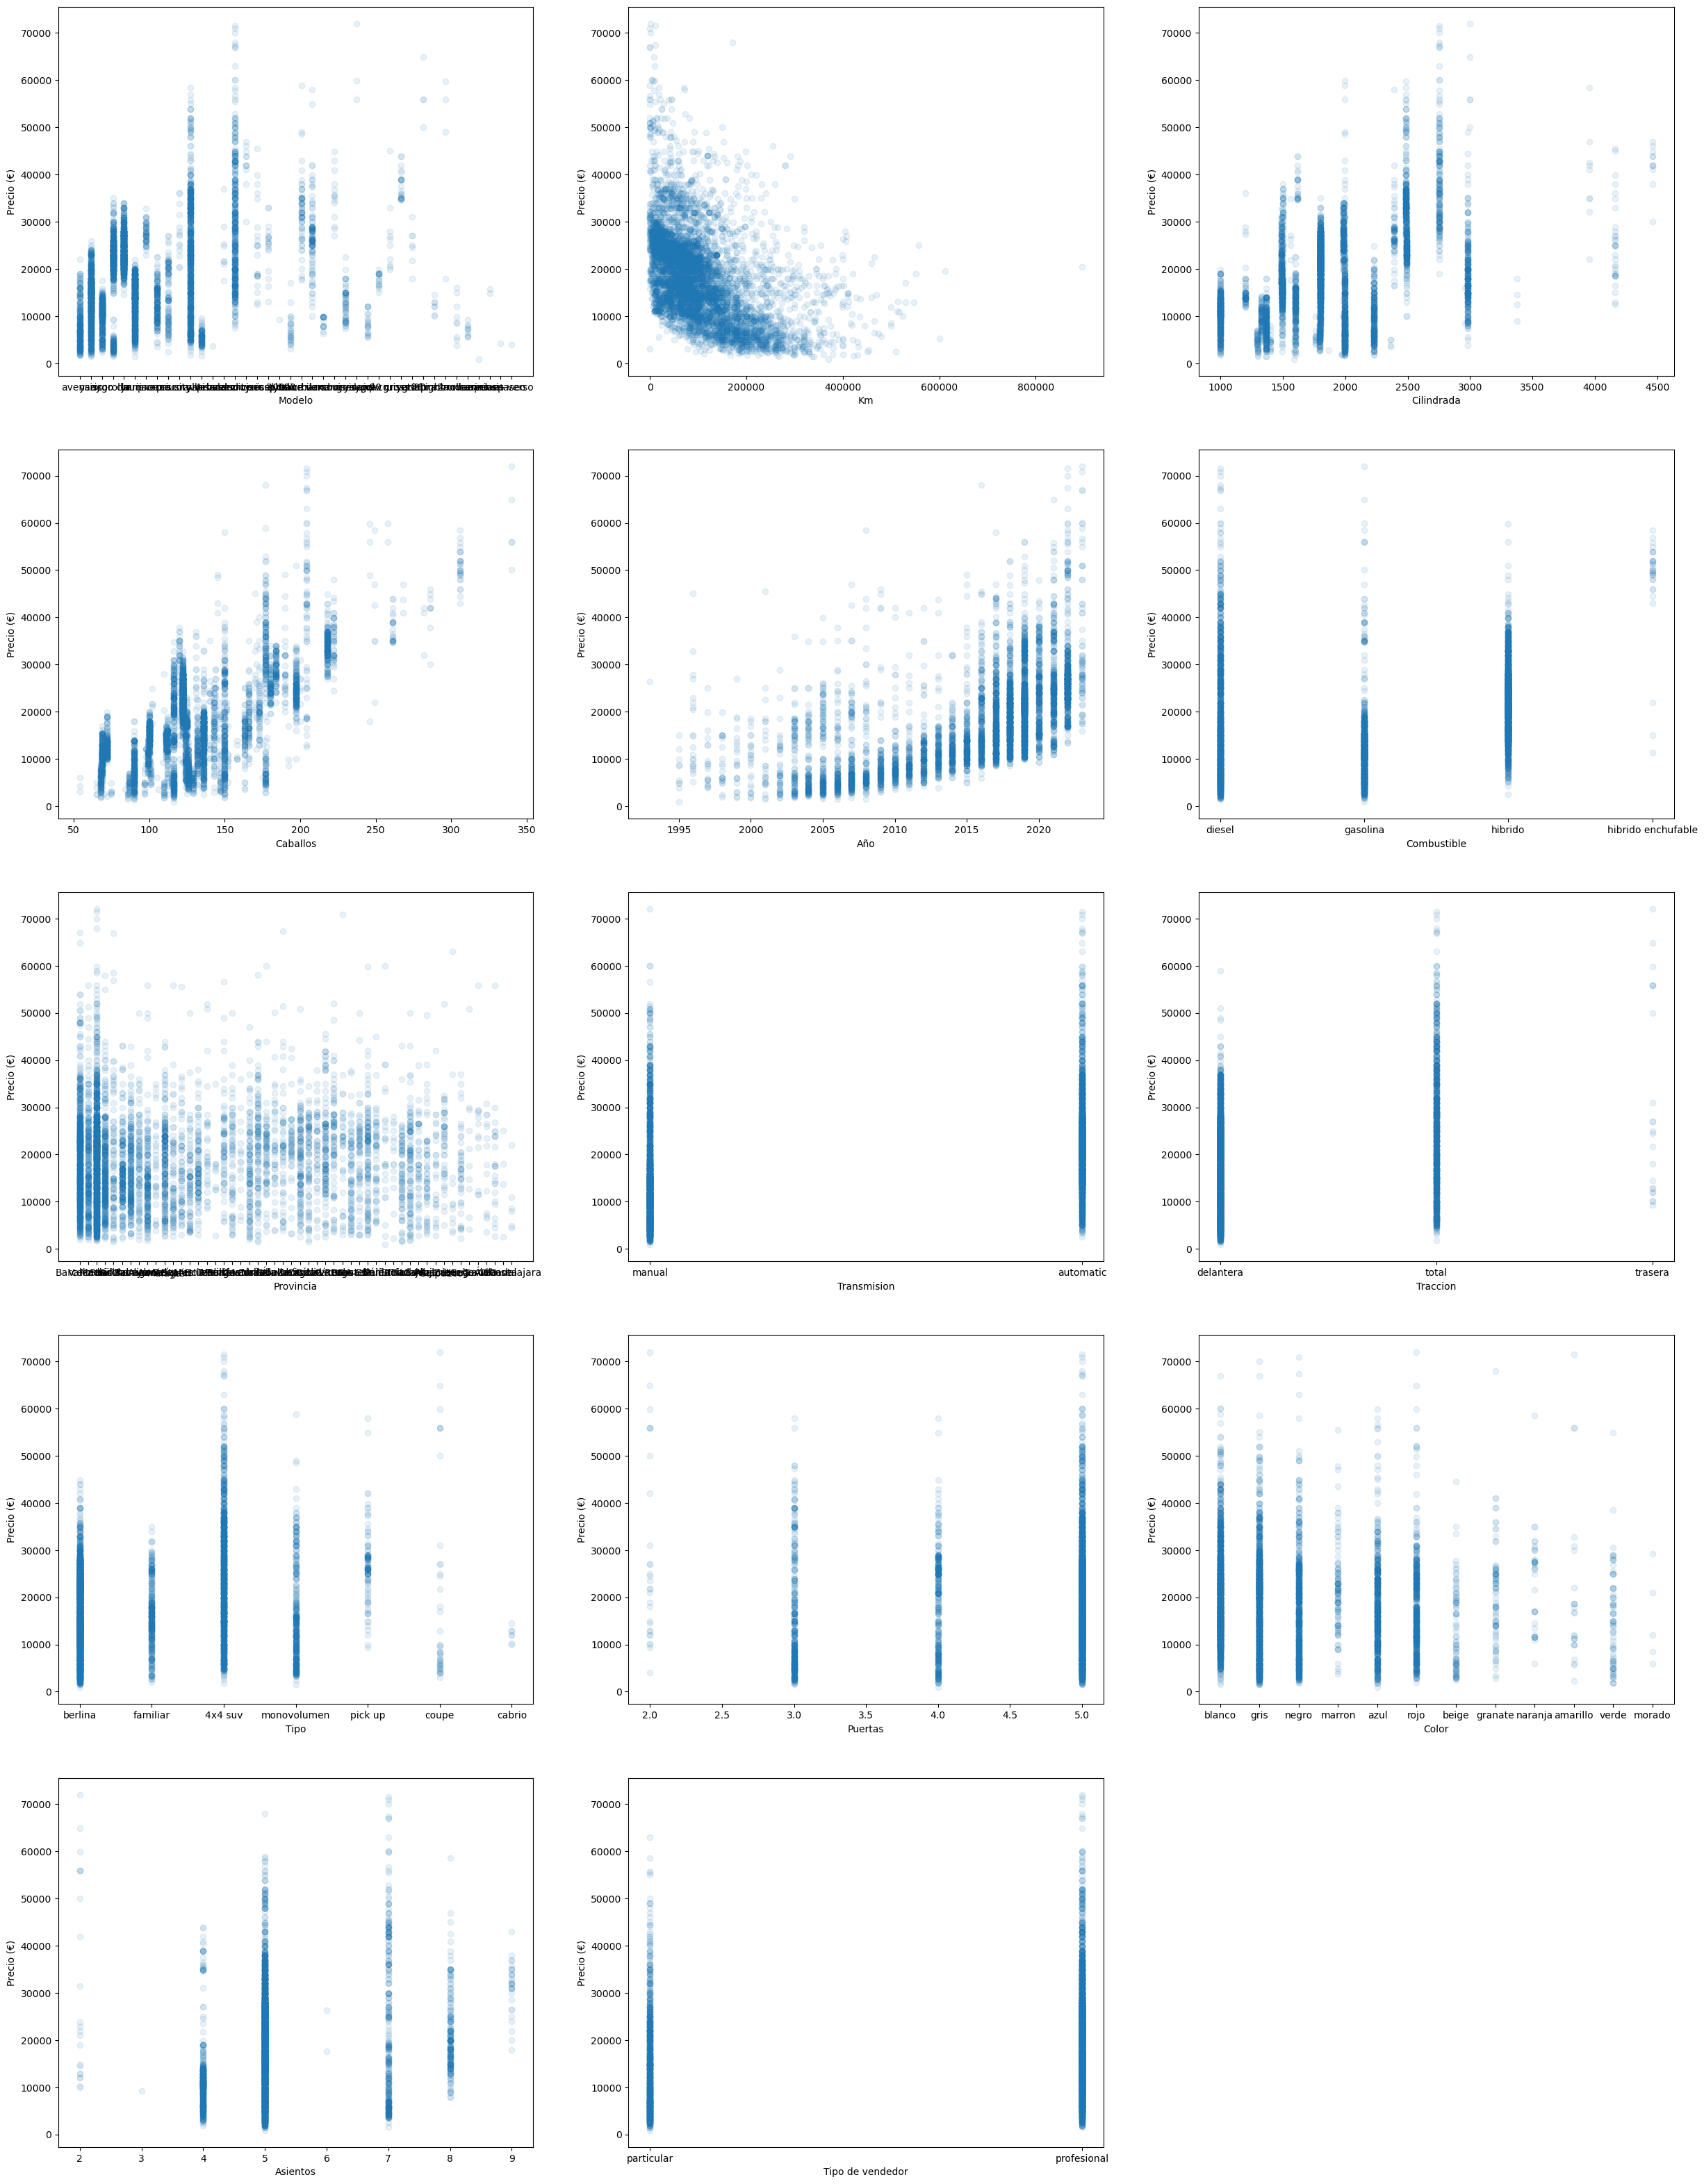

In [52]:
numerical_variables = ['Modelo', 'Km', 'Cilindrada', 'Caballos', 'Año', 'Combustible', 'Provincia', 'Transmision', 
                       'Traccion', 'Tipo','Puertas', 'Color', 'Asientos', 'Tipo de vendedor']

_= plt.figure(figsize=(30,40))

for index, variable in enumerate(numerical_variables):
    _= plt.subplot(5, 3, index+1)
    _= plt.scatter(x=data[variable], y=data['Precio'], alpha=0.1)
    _= plt.xlabel(variable)
    _= plt.ylabel('Precio (€)')

## Tratamiento de variables categóricas

Renombro la columna Transmision por Automatico, de esta forma puedo establecer con 0 si no es automático y 1 si lo es.

Renombro la columna Tipo de vendedor por Particular, de esta forma puedo establecer con 0 si no es un vendedor particular y 1 si lo es

Los modelos los tranformo en variables numéricas, asignando un número diferente para cada modelo

En el resto de variables se utiliza una codificación one hot utilizando get_dummies()

In [53]:
data = data.rename(columns={'Transmision': 'Automatico', 'Tipo de vendedor': 'Particular'})
data['Automatico'].replace(['manual', 'automatic'], [0, 1], inplace=True)
data['Particular'].replace(['particular', 'profesional'], [0, 1], inplace=True)
data['Modelo'], _ = pd.factorize(data['Modelo'])
data.head()

,Modelo,Km,Cilindrada,Caballos,Año,Combustible,Provincia,Automatico,Traccion,Tipo,Puertas,Color,Asientos,Particular,Precio
0,0,162000,1998,124,2012,diesel,Barcelona,0,delantera,berlina,4,blanco,5,0,7900
1,1,64707,1496,111,2020,gasolina,Valencia,0,delantera,berlina,5,gris,5,1,15350
2,2,40971,998,69,2018,gasolina,Madrid,0,delantera,berlina,3,blanco,4,1,12890
3,3,15313,1798,122,2022,hibrido,Madrid,1,delantera,berlina,5,negro,5,1,23999
4,4,33911,1798,122,2022,hibrido,Madrid,1,delantera,berlina,5,marron,5,1,24999


### Matriz de correlación

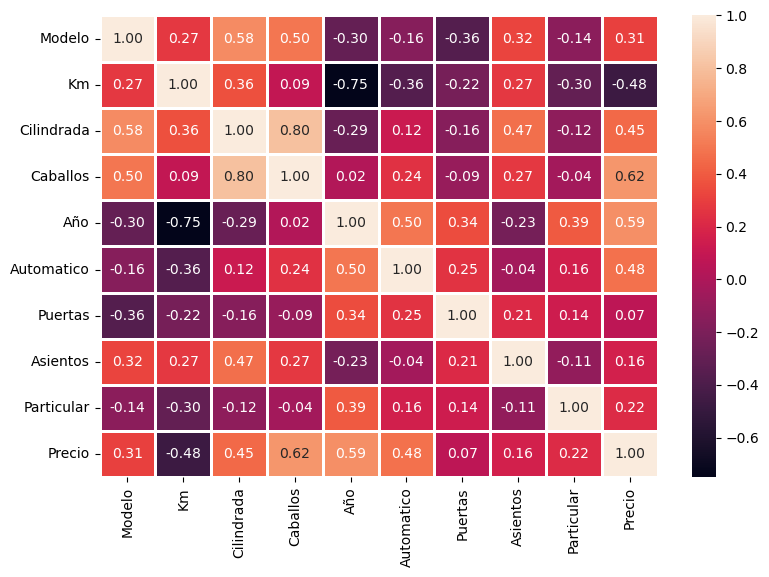

In [54]:
_= plt.subplots(figsize=(9,6))
_= sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=2)

### F Regression y Mutual Information Score

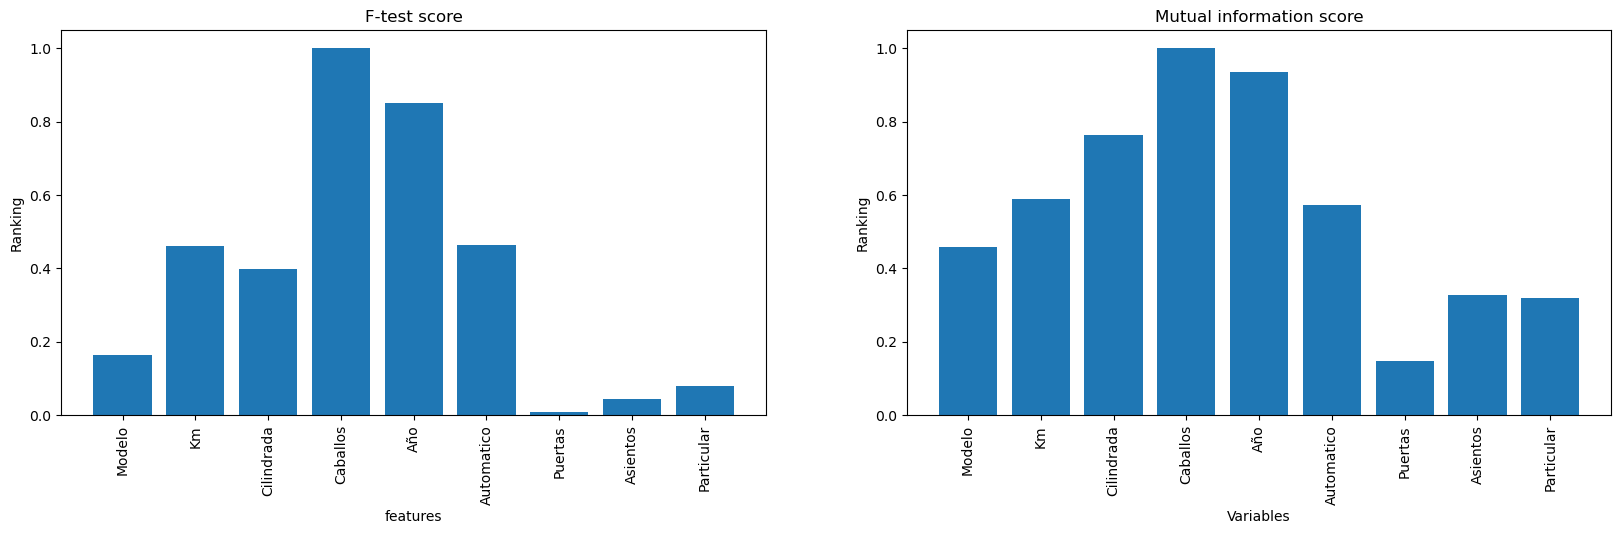

In [55]:
# convertimos el DataFrame al formato necesario para scikit-learn
data2 = data.loc[:, ['Modelo', 'Km', 'Cilindrada', 'Caballos', 'Año', 'Automatico', 'Puertas', 'Asientos', 'Particular', 'Precio']]
data3 = data2.values

y = data3[:, -1]     # variable objetivo (price)
X = data3[:,:-1]     # resto de columnas

feature_names = data2.columns[:-1]

# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
_= plt.figure(figsize=(20, 5))

_= plt.subplot(1,2,1)
_= plt.bar(range(X.shape[1]), f_test,  align="center")
_= plt.xticks(range(X.shape[1]), feature_names, rotation = 90)
_= plt.xlabel('features')
_= plt.ylabel('Ranking')
_= plt.title('F-test score')

_= plt.subplot(1,2,2)
_= plt.bar(range(X.shape[1]), mi, align="center")
_= plt.xticks(range(X.shape[1]), feature_names, rotation = 90)
_= plt.xlabel('Variables')
_= plt.ylabel('Ranking')
_= plt.title('Mutual information score')

_= plt.show()